In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

  Age Group  Number of Patients
2  (40, 50]                  81
0  (20, 30]                  47
3  (50, 60]                  43
1  (30, 40]                  29


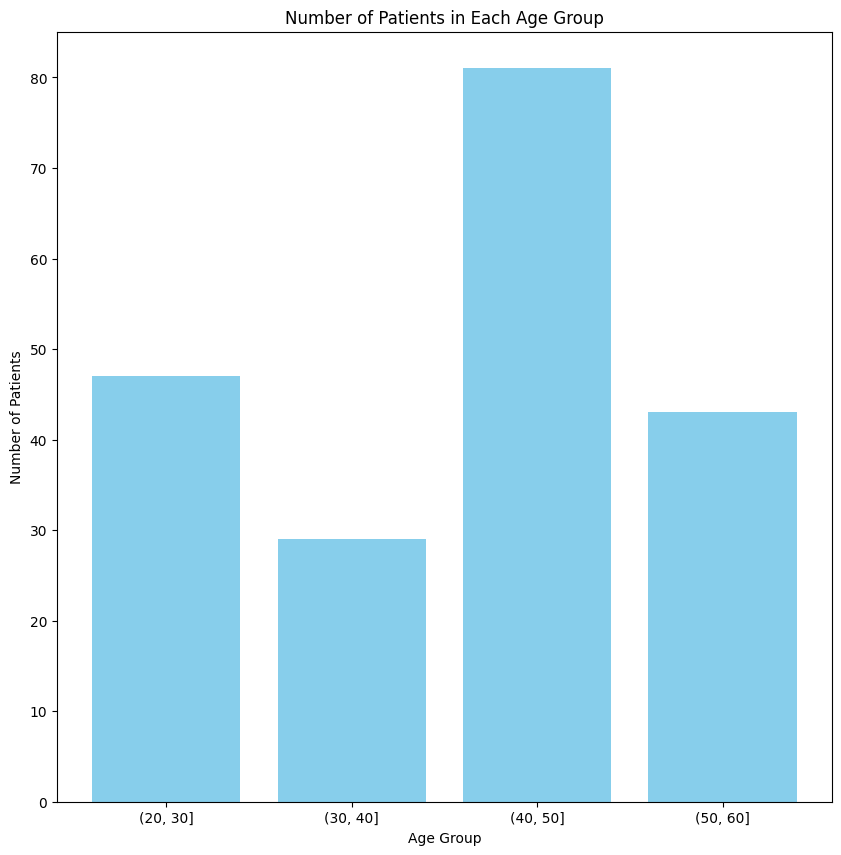

In [8]:
# ---
# Group No. 2
# 1. จิรกานต์  แก้วภิรมภ์    6410450389
# 2. ธนัตถ์     แซ่ฉั่ว         6410450478
# 3. อาทิตยา เกตเลขวัตร  6410451938
# ---

group = 2
problem = 2 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".txt"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"_output_"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"_plot_"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path, delimiter='\s+')

# --- เริ่มเขียนโค้ดตรงนี้ ---
#คำนวณค่าเฉลี่ยอายุแทนค่าลงในค่า NaN
average_age = data['Age'].mean(skipna=True)
#แทนค่าลงในค่า NaN ด้วยค่าเฉลี่ยอายุ
data["Age"].fillna(average_age, inplace=True)

# แปลงค่าอายุเป็นจำนวนเต็ม
data["Age"] = data["Age"].astype(int)

# สร้างกลุ่มอายุ (Age Group)
# กำหนดขอบเขตของกลุ่มอายุ
bins = [20, 30, 40, 50, 60]
# กำหนดป้ายชื่อของกลุ่มอายุ
labels = ["(20, 30]", "(30, 40]", "(40, 50]", "(50, 60]"]
# นำข้อมูลอายุและแบ่งเป็นกลุ่มตามขอบเขตและป้ายชื่อที่กำหนด
data["Age Group"] = pd.cut(data["Age"], bins=bins, labels=labels, right=False)

# นับจำนวนผู้ป่วยในแต่ละกลุ่มอายุ
age_group_counts = data["Age Group"].value_counts().reset_index()
# เปลี่ยนชื่อคอลัมน์ให้เหมาะสม
age_group_counts.columns = ["Age Group", "Number of Patients"]

# สร้าง DataFrame ที่มีทุกกลุ่มอายุที่คุณต้องการแสดง
all_age_groups = pd.DataFrame({"Age Group": ["(20, 30]", "(30, 40]", "(40, 50]", "(50, 60]"]})

# รวมข้อมูลจาก age_group_counts และ all_age_groups โดยใช้ merge
age_group_counts = all_age_groups.merge(age_group_counts, on="Age Group", how="left")

# สร้างกราฟแท่งโดยใช้ข้อมูลจำนวนผู้ป่วยในแต่ละกลุ่มอายุพร้อมทั้งกำหนดชื่อกราฟ ชื่อแกน x,y
plt.figure(figsize=(10, 10))
plt.bar(age_group_counts["Age Group"], age_group_counts["Number of Patients"], color='skyblue')
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.title("Number of Patients in Each Age Group")

# เรียงจากมากไปน้อยเพื่อให้เซฟผลลัพธ์ได้เหมือนใน expected
age_group_counts = age_group_counts.sort_values(by="Number of Patients", ascending=False)

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
age_group_counts.to_csv(result_path, index=False)

# แสดงผลลัพธ์
print(age_group_counts.head())

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()